### **Etapa 1: Pré-processamento dos Dados**

Este trecho de código é responsável pelo **pré-processamento dos dados** de uma instância do problema. Primeiro, ele realiza a **leitura do grafo** a partir de um arquivo de entrada, representando a estrutura do problema através de vértices, arestas e arcos. Em seguida, são calculadas **estatísticas fundamentais** sobre o grafo, incluindo o número total de vértices, arestas e arcos, bem como a quantidade de elementos requeridos para atendimento. Além disso, são determinadas métricas como **densidade do grafo, número de componentes conectados, grau mínimo e máximo dos vértices**, permitindo uma análise detalhada da conectividade da estrutura.

Após a obtenção dessas métricas, o código executa o algoritmo **Floyd-Warshall** para calcular a matriz de caminhos mais curtos entre todos os pares de nós, viabilizando o cálculo de intermediação, comprimento médio dos caminhos e diâmetro do grafo


--- Totais ---
Quantidade Total de Vértices: 12
Quantidade Total de Arestas: 22
Quantidade Total de Arcos: 22

--- Requeridos ---
Quantidade de Vértices Requeridos: 7
Quantidade de Arestas Requeridas: 22
Quantidade de Arcos Requeridos: 11

--- Outros ---
Densidade do Grafo: 0.3333333333333333
Componentes Conectados: 1
Grau (mínimo, máximo): (6, 10)
Intermediação: {4: 0, 3: 6, 10: 6, 2: 22, 11: 0, 12: 22, 7: 22, 9: 14, 5: 14, 6: 38, 8: 16, 1: 18}
Caminho Médio: 16.71212121212121
Diâmetro: 30


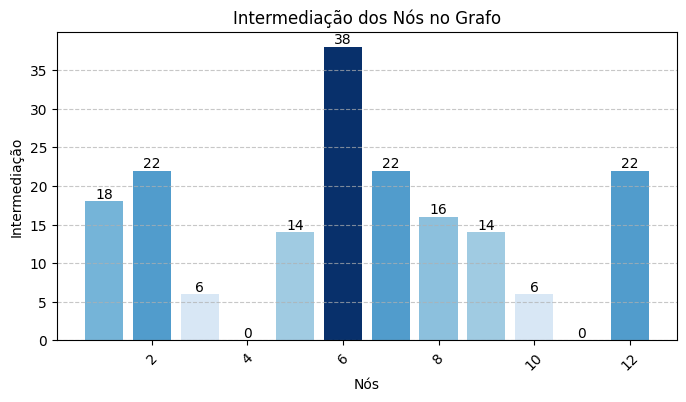

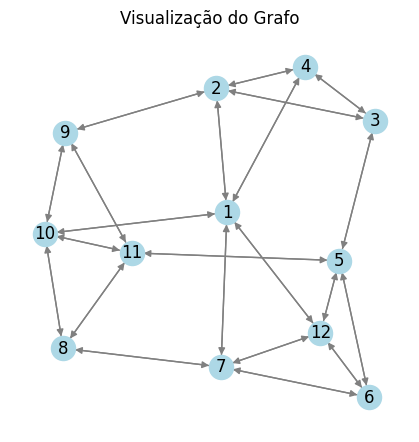

In [2]:
import sys
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

sys.path.append("../src")
sys.path.append("../data")

from leitura_dados import ler_arquivo
from estatisticas import *

# Ler o grafo e a capacidade do veículo
grafo = ler_arquivo("../data/BHW1.dat") 

print("\n--- Totais ---")
print(f"Quantidade Total de Vértices: {quantidade_vertices(grafo)}")
print(f"Quantidade Total de Arestas: {quantidade_arestas(grafo)}")
print(f"Quantidade Total de Arcos: {quantidade_arcos(grafo)}")

print("\n--- Requeridos ---")
print(f"Quantidade de Vértices Requeridos: {quantidade_vertices_requeridos(grafo)}")
print(f"Quantidade de Arestas Requeridas: {quantidade_arestas_requeridas(grafo)}")
print(f"Quantidade de Arcos Requeridos: {quantidade_arcos_requeridos(grafo)}")

print("\n--- Outros ---")
print("Densidade do Grafo:", densidade(grafo))
print("Componentes Conectados:", componentes_conectados(grafo))
print("Grau (mínimo, máximo):", grau_min_max(grafo))

# Executa o algoritmo de caminhos mais curtos
caminhos, caminhos_completos = floyd_warshall(grafo)

print("Intermediação:", intermediacao(grafo, caminhos_completos)) 
print("Caminho Médio:", caminho_medio(caminhos))
print("Diâmetro:", diametro(caminhos))

# Dados da intermediação
intermediacao_dict = intermediacao(grafo, caminhos_completos)

# Ordenação dos nós pela intermediação (do maior para o menor)
nos_ordenados = sorted(intermediacao_dict.keys(), key=lambda x: intermediacao_dict[x], reverse=True)
valores_ordenados = [intermediacao_dict[no] for no in nos_ordenados]

# Criando o gráfico de barras
plt.figure(figsize=(8, 4))
valores_ordenados = np.array(valores_ordenados)  # Converte a lista em um array NumPy
norm = plt.Normalize(min(valores_ordenados), max(valores_ordenados))  # Normaliza os valores
colors = plt.cm.Blues(norm(valores_ordenados))  # Aplica coloração baseada na normalização

bars = plt.bar(nos_ordenados, valores_ordenados, color=colors)

# Adicionando os valores no topo das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', fontsize=10)

# Melhorias visuais
plt.xlabel("Nós")
plt.ylabel("Intermediação")
plt.title("Intermediação dos Nós no Grafo")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

# Criando a visualização do grafo usando NetworkX
G = nx.DiGraph()

# Adicionando arestas e arcos ao grafo
for aresta in grafo.arestas:
    if not aresta.direcionado:  # Arestas bidirecionais
        G.add_edge(aresta.origem, aresta.destino, color='gray')
        G.add_edge(aresta.destino, aresta.origem, color='gray')

for arco in grafo.arestas:
    if arco.direcionado:  # Arcos unidirecionais
        G.add_edge(arco.origem, arco.destino, color='red')

plt.figure(figsize=(4, 4))
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", arrows=True)
plt.title("Visualização do Grafo")
plt.show()


## **Etapa 2: Solução construtiva**

Este trecho de código implementa um **algoritmo construtivo** desenvolvido para criar uma solução viável para o problema de roteamento de veículos. A execução começa com a **leitura das instâncias** e a construção do grafo representando a estrutura do problema. A partir desse grafo, uma **heurística construtiva** é aplicada para gerar uma solução inicial que respeita as restrições do problema.

A heurística inicia com a identificação dos **serviços requeridos**, que podem ser nós, arestas ou arcos do grafo. Em seguida, um processo de **clusterização gulosa** agrupa os serviços de maneira eficiente, priorizando aqueles com maior demanda e buscando minimizar a distância entre serviços agrupados. Após essa etapa, são geradas **rotas para atender aos clusters**, partindo do depósito e percorrendo os serviços de forma otimizada. Para cada rota, o algoritmo calcula seu **custo total e demanda**, garantindo que a capacidade dos veículos seja respeitada.

Por fim, a solução encontrada é **armazenada em arquivos de saída**.

In [ ]:
import sys
import os

sys.path.append("../src")

from leitura_dados import ler_arquivo
from heuristica_construtiva import heuristica_construtiva

# pastas de trabalho ----------------------------------------------------------
PASTA_IN  = "../data/"
PASTA_OUT = "../solucoes/"
os.makedirs(PASTA_OUT, exist_ok=True)

# -----------------------------------------------------------------------------
for arquivo in (f for f in os.listdir(PASTA_IN) if f.endswith(".dat")):
    print(f"\nProcessando: {arquivo}")

    # Leitura da instância e construção do grafo
    grafo = ler_arquivo(os.path.join(PASTA_IN, arquivo))

    custo_total, rotas, tempo_execucao_original = heuristica_construtiva(grafo)

    # -------------------------- grava arquivo de saída ------------------------
    saida = os.path.join(PASTA_OUT, f"sol-{arquivo}")
    with open(saida, "w") as f:
        f.write(f"{int(custo_total)}\n")
        f.write(f"{len(rotas)}\n")
        f.write(f"{tempo_execucao_original}\n")
        f.write(f"{tempo_execucao_original}\n") # O tempo total já encontra a melhor solução
        for i, (demanda_rota, custo_rota, rota) in enumerate(rotas, 1):
            total_visitas = len(rota)
            linha = f"0 1 {i} {demanda_rota} {int(custo_rota)} {total_visitas} "
            for serv in rota:
                tipo, id_s, ori, dest = serv
                if tipo == 'D':
                    linha += "(D 0,1,1) "
                else:
                    linha += f"(S {id_s},{ori},{dest}) "
            linha += "\n"
            f.write(linha)

    print(f"Solução salva em: {saida}")



Processando: BHW1.dat
Solução salva em: ../solucoes/sol-BHW1.dat

Processando: mggdb_0.40_19.dat
Solução salva em: ../solucoes/sol-mggdb_0.40_19.dat

Processando: mggdb_0.40_17.dat
Solução salva em: ../solucoes/sol-mggdb_0.40_17.dat

Processando: mggdb_0.40_22.dat
Solução salva em: ../solucoes/sol-mggdb_0.40_22.dat

Processando: mggdb_0.40_16.dat
Solução salva em: ../solucoes/sol-mggdb_0.40_16.dat

Processando: BHW3.dat
Solução salva em: ../solucoes/sol-BHW3.dat

Processando: mggdb_0.40_21.dat
Solução salva em: ../solucoes/sol-mggdb_0.40_21.dat

Processando: mggdb_0.40_12.dat
Solução salva em: ../solucoes/sol-mggdb_0.40_12.dat

Processando: BHW4.dat
Solução salva em: ../solucoes/sol-BHW4.dat

Processando: BHW2.dat
Solução salva em: ../solucoes/sol-BHW2.dat

Processando: mggdb_0.40_20.dat
Solução salva em: ../solucoes/sol-mggdb_0.40_20.dat

Processando: mggdb_0.40_15.dat
Solução salva em: ../solucoes/sol-mggdb_0.40_15.dat

Processando: mggdb_0.40_18.dat
Solução salva em: ../solucoes/so

## Etapa 3: Comparação e Otimização da Heurística

Nesta etapa, criamos uma versão otimizada da heurística construtiva, com foco na **redução do tempo de execução**.

A principal mudança foi a introdução de uma versão **híbrida** que decide dinamicamente entre os algoritmos **Floyd-Warshall** e **Dijkstra** com base no tamanho do grafo:

- **Grafos pequenos**: continuam utilizando Floyd-Warshall.
- **Grafos grandes**: usam Dijkstra apenas nos nós relevantes, reduzindo o tempo de execução.

A otimização foi implementada no novo arquivo `heuristica_construtiva_otimizada.py`, junto com o módulo `dijkstra.py`.

No código principal, foi adicionado um novo bloco que executa **ambas as versões da heurística** para cada instância. O objetivo é comparar os tempos de execução — apenas o tempo da versão otimizada é adicionado ao arquivo de saída; as rotas continuam sendo geradas com a heurística original.

In [3]:
import sys
import os

sys.path.append("../src")

# 1. Importar AMBAS as funções de heurística
from leitura_dados import ler_arquivo
from heuristica_construtiva_otimizada import heuristica_construtiva_otimizada

# pastas de trabalho ----------------------------------------------------------
PASTA_IN  = "../data/"
PASTA_OUT = "../solucoes/"
os.makedirs(PASTA_OUT, exist_ok=True)

# -----------------------------------------------------------------------------
for arquivo in (f for f in os.listdir(PASTA_IN) if f.endswith(".dat")):
    print(f"\nProcessando: {arquivo}")

    # Leitura da instância e construção do grafo
    grafo = ler_arquivo(os.path.join(PASTA_IN, arquivo))

    # --- EXECUÇÃO E MEDIÇÃO DE TEMPO ---

    # 3. Executa a heurística OTIMIZADA para obter o novo tempo de execução
    # A solução (custo, rotas) da otimizada não é usada no arquivo final, apenas o tempo.
    custo_total, rotas, tempo_execucao_otimizado = heuristica_construtiva_otimizada(grafo)
    print(f"Tempo Otimizado: {tempo_execucao_otimizado} µs")


    # -------------------------- grava arquivo de saída ------------------------
    saida = os.path.join(PASTA_OUT, f"sol-{arquivo}")
    with open(saida, "w") as f:
        # A solução escrita (custo, n_rotas, detalhes da rota) é sempre a da heurística ORIGINAL
        f.write(f"{int(custo_total)}\n")
        f.write(f"{len(rotas)}\n")
        
        # Escreve os dois tempos, conforme o plano
        f.write(f"{tempo_execucao_otimizado}\n")
        f.write(f"{tempo_execucao_otimizado}\n") 
        
        for i, (demanda_rota, custo_rota, rota) in enumerate(rotas, 1):
            total_visitas = len(rota)
            linha = f"0 1 {i} {demanda_rota} {int(custo_rota)} {total_visitas} "
            for serv in rota:
                tipo, id_s, ori, dest = serv
                if tipo == 'D':
                    linha += "(D 0,1,1) "
                else:
                    linha += f"(S {id_s},{ori},{dest}) "
            linha += "\n"
            f.write(linha)

    print(f"Solução salva em: {saida}")


Processando: DI-NEARP-n442-Q16k.dat
Grafo grande (761 nós). Usando Dijkstra em 409 nós relevantes.
Tempo Otimizado: 416135 µs
Solução salva em: ../solucoes/sol-DI-NEARP-n442-Q16k.dat

Processando: mgval_0.45_6C.dat
Grafo grande (31 nós). Usando Dijkstra em 30 nós relevantes.
Tempo Otimizado: 1237 µs
Solução salva em: ../solucoes/sol-mgval_0.45_6C.dat

Processando: mgval_0.25_8A.dat
Grafo grande (30 nós). Usando Dijkstra em 29 nós relevantes.
Tempo Otimizado: 1735 µs
Solução salva em: ../solucoes/sol-mgval_0.25_8A.dat

Processando: mggdb_0.45_21.dat
Grafo pequeno (11 nós). Usando Floyd-Warshall.
Tempo Otimizado: 223 µs
Solução salva em: ../solucoes/sol-mggdb_0.45_21.dat

Processando: DI-NEARP-n422-Q4k.dat
Grafo grande (710 nós). Usando Dijkstra em 377 nós relevantes.
Tempo Otimizado: 323729 µs
Solução salva em: ../solucoes/sol-DI-NEARP-n422-Q4k.dat

Processando: CBMix15.dat
Grafo grande (52 nós). Usando Dijkstra em 51 nós relevantes.
Tempo Otimizado: 3344 µs
Solução salva em: ../soluco